1. Classification decision trees address categorical classification problems by splitting the data into subsets based on feature values. This could be used for medical diagnoses, fraud detection and email filtering. Linear regression calculates an equation to estimate a continuous outcome.

2. 
Accuracy: Predicting whether or not students in a class will pass or fail an upcoming test when it is expected that roughly half of the class will pass and fail the test. Accuracy should be used because there is a roughly equal class distribution and the cost of misclassifying a student is approximately equal.

Sensitivity: Diagnosing a serious medical condition in patients. Sensitivity should be used because the cost of misclassifying a positive case is much higher than the cost for a negative case. Using sensitivity will ensure that most patients with the medical condition will be correctly diagnosed.

Specificity: Drug testing in sports. Specificity should be used since false positives can be extremely damaging to an athletes career which is a higher cost than missing identifying doping since the athletes get tested many times so eventually the athlete will get caught if they are cheating. For this we are trying to avoid all false positives.

Precision: Fraud detection. Precision should be used since false positives will be disruptive and waste time. So true positives should be focussed on as this will reduce unnecessary investigations and save financial institutions lots of time which increases efficiency. For this we are trying to minimize false positives

In [11]:
#3.
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

# Preprocessing steps
# 1. Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")

# Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert columns to specified types
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [13]:
#4.
# Split the data into 80% training and 20% test set
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=41)

# Print the number of observations in each dataset
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")

Number of observations in the training set: 255
Number of observations in the test set: 64


The first step converts Hard_or_Paper into binary indicator variables (1 for Hard, 0 for Paper). The second step makes the predictor variable X that uses List Price to predict the target variable (y).

In [14]:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

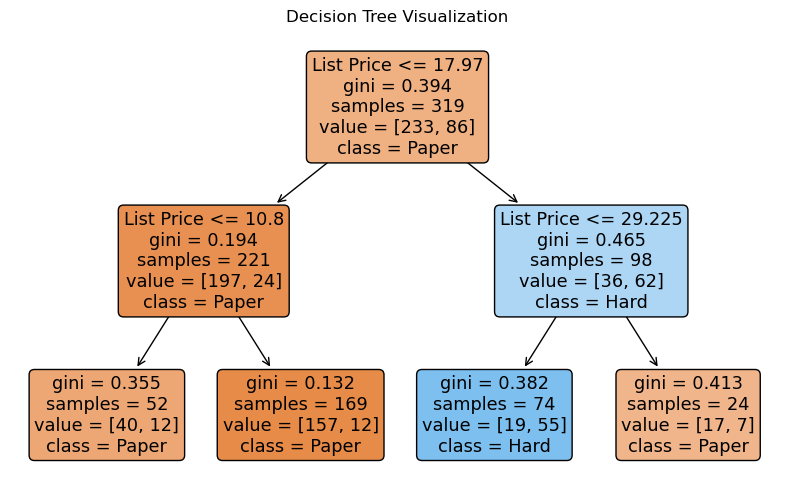

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 6))  # Set the figure size
plot_tree(
    clf,
    feature_names=X.columns,  # Feature names for the splits
    class_names=["Paper", "Hard"],  # Class names
    filled=True,  # Fill nodes with colors based on the class
    rounded=True,  # Use rounded nodes
)
plt.title("Decision Tree Visualization")
plt.show()

The decision tree made it's predictions based on the list price of the book. If the list price is greater than or equal to 17.97 and less than or equal to 29.225 the tree will predict that the book is hardcover and if it does not fit these characteristics then the model will predict the book to be paperback.

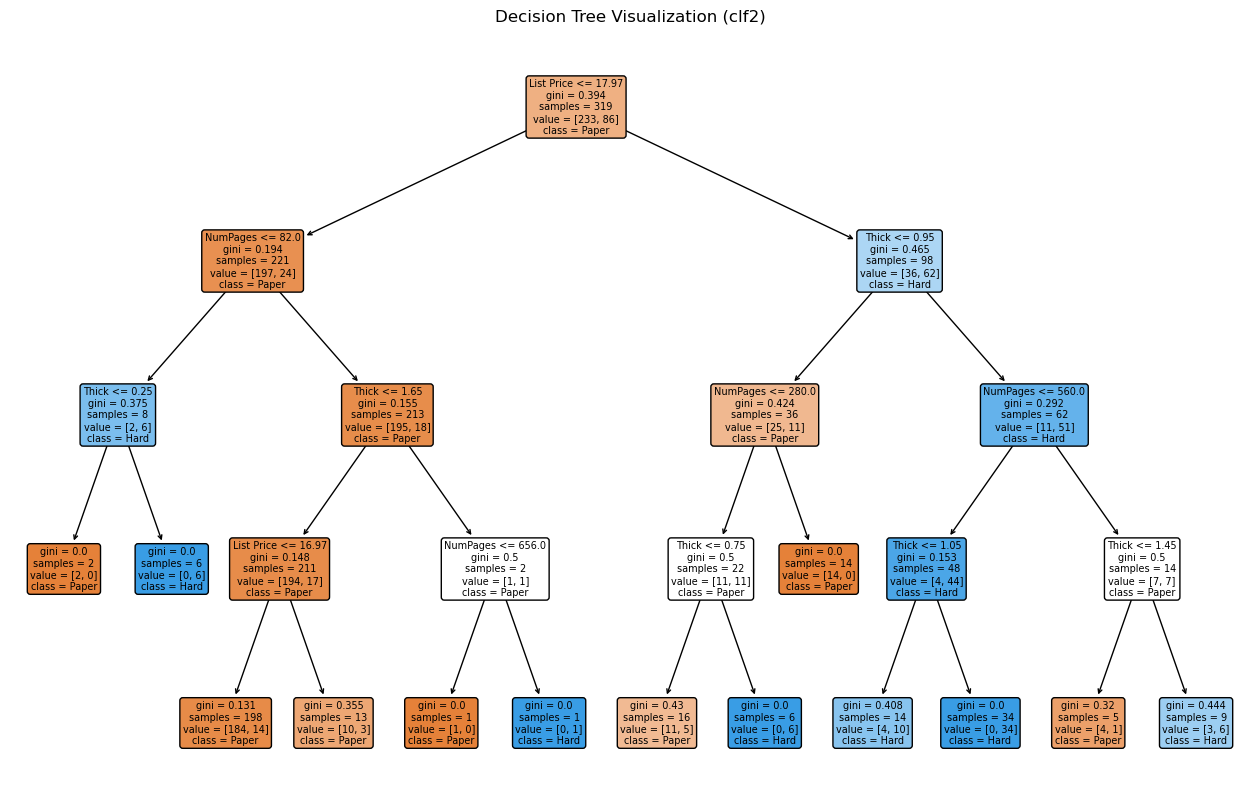

In [16]:
#5
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the features (NumPages, Thick, List Price) and the target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Train the Decision Tree with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(
    clf2,
    feature_names=X.columns,  # Feature names: NumPages, Thick, List Price
    class_names=["Paper", "Hard"],  # Target classes
    filled=True,  # Color the nodes based on prediction probabilities
    rounded=True,  # Rounded nodes for better visualization
)
plt.title("Decision Tree Visualization (clf2)")
plt.show()

The decision tree makes it's predictions based off of splitting the data's features. This continues until the final boxes (leafs) when it makes a prediction for all of the data points that fit all of the characteristics of that leaf.

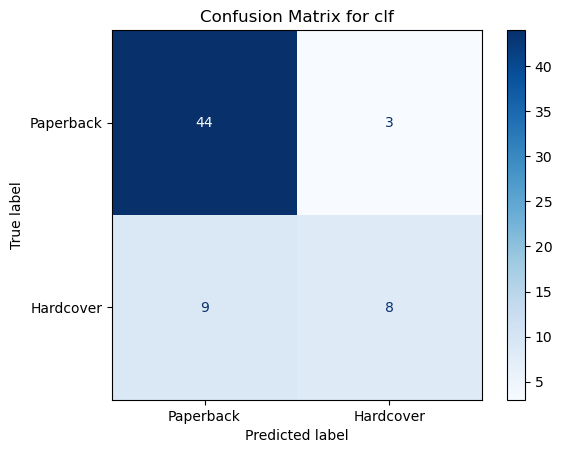

Metrics for clf:
Sensitivity: 0.47
Specificity: 0.94
Accuracy: 0.81


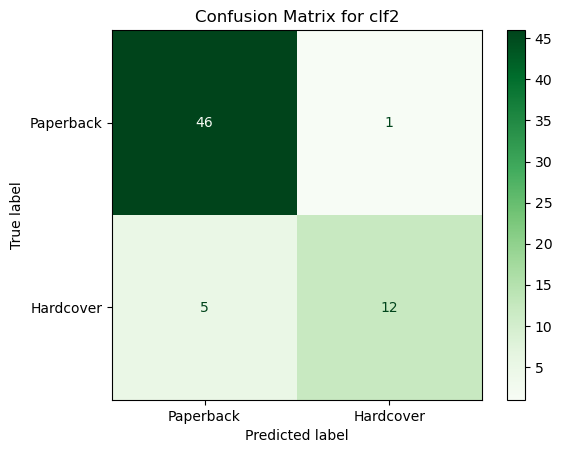

Metrics for clf2:
Sensitivity: 0.71
Specificity: 0.98
Accuracy: 0.91


In [17]:
#6
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Split the test data into features and target
X_test_clf = ab_reduced_noNaN_test[['List Price']]  # Features for clf
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features for clf2
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable

# Predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix for clf")
plt.show()

# Metrics for clf
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity = Recall
specificity_clf = specificity_score(y_test, y_pred_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

print(f"Metrics for clf:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])
disp_clf2.plot(cmap="Greens", values_format='d')
plt.title("Confusion Matrix for clf2")
plt.show()

# Metrics for clf2
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)  # Sensitivity = Recall
specificity_clf2 = specificity_score(y_test, y_pred_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

print(f"Metrics for clf2:")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")

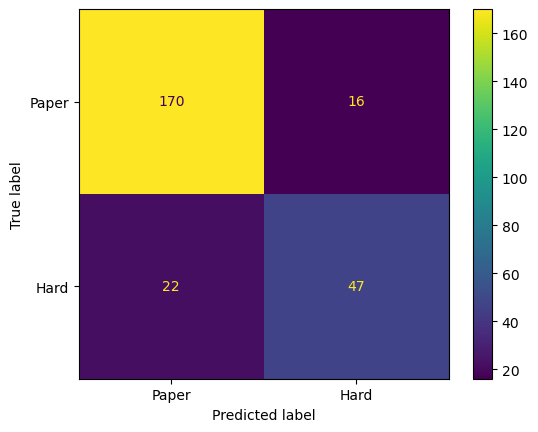

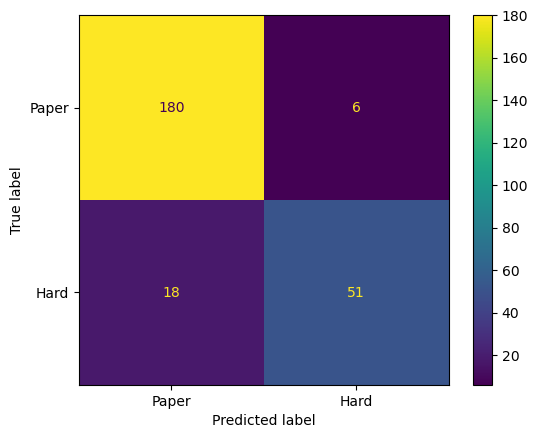

In [24]:
#7
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"], 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"],
                     clf2.predict(ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The two confusion matrices are different because they use different features to make predictions. The first one only uses List Price to determine if the book is paperback or hard cover while the second one uses the number of pages, thickness and list price to make this prediction. The confidence matrices in question 6 are better and more useful since they show the test data which means that the decision tree has not been trained based off of it. We use the test data to gauge how good our model is so that we can see how it performs using new data which shows how good the model is at predicting future data. This makes sure that our model does not overfit to the training data which will ultimately lead to a model which is bad at predicting anything that is not the training data.

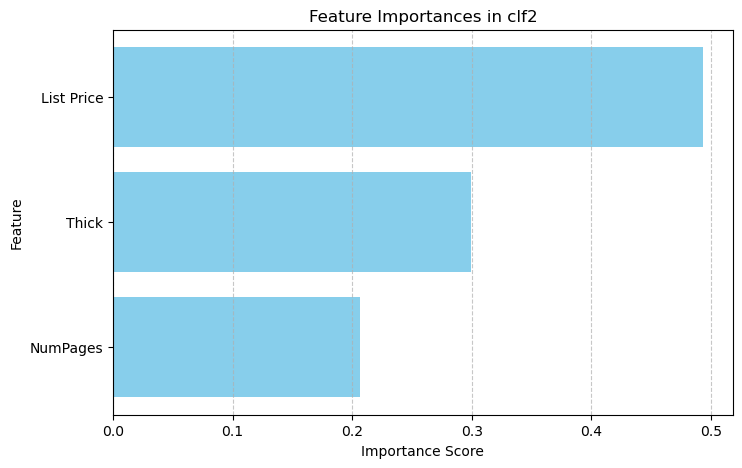

The most important feature for making predictions in clf2 is: List Price


In [8]:
#8
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature importances and corresponding feature names
importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Visualize the feature importances
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances in clf2")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Report the most important feature
most_important_feature_index = np.argmax(importances)
most_important_feature = features[most_important_feature_index]

print(f"The most important feature for making predictions in clf2 is: {most_important_feature}")

9. Coefficients in linear regression directly show the relationship between each predictor variable and the target variable while assuming all other variables are constant. Feature importances in decision trees reflect the relative contribution of each feature of the data. This does not assume linear relationships or feature independence, they also do not show direction.

10. Yes :)

ChatGPT Summary:
"In this discussion, we explored various aspects of classification decision trees, including data preprocessing, training, evaluation, and interpretation. We began by preparing a dataset (ab_reduced_noNaN) by removing irrelevant columns, dropping rows with missing values, and converting certain variables to appropriate data types. We then created training and testing datasets using an 80/20 split. Using scikit-learn, we trained and visualized two decision tree models: clf, which used List Price as the sole predictor, and clf2, which incorporated NumPages, Thick, and List Price.

To evaluate the models, we created confusion matrices for both clf and clf2 on the test dataset, calculating metrics such as sensitivity, specificity, and accuracy. We noted that clf2, with its additional features and a higher max_depth, performed better due to its ability to capture more complex relationships. Additionally, we visualized the feature importances for clf2, identifying the most significant predictor variable. Lastly, we contrasted the interpretation of regression coefficients in linear models, which indicate the magnitude and direction of relationships, with feature importances in decision trees, which reflect relative contributions to impurity reduction without assuming linearity or independence."
https://chatgpt.com/share/67400870-f558-8007-8eb3-88ea9ee0009a